<a href="https://colab.research.google.com/github/saurabh423/Face_Emotion_Recognition/blob/main/(Self_Notebook)Face_emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

**Live Class Monitoring System(Face Emotion Recognition)**

# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.


In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# **Problem Statements**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.


# **What is Face Emotion Recognition?**

Facial emotion recognition is the process of detecting human emotions from facial expressions. The human brain recognizes emotions automatically, and software has now been developed that can recognize emotions as well.

# **Importing Libraries**


In [2]:
import os
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## CNN Models ##
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# **Reading the Data**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd /content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/

/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat


In [6]:
import tarfile

fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [7]:
batch_size = 32
num_epochs = 40
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/fer2013/fer2013.csv')

In [9]:
# Printing shape of the data
print(df.shape)

(35887, 3)


In [10]:
# Return the first 5 rows.
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [11]:
# Return unique values emotion
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [12]:
# Dictionary mapping for individual emotions
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [13]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


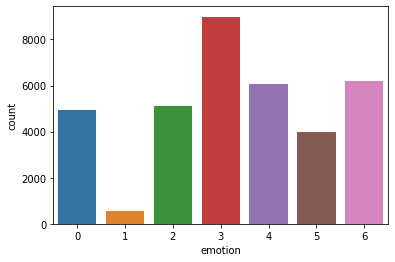

In [14]:
sns.countplot(df.emotion)
plt.show()

From above plot we can observe that majority of the classes belongs to **3:Happy**, **4:Sad** and **6:Neutral** on the otherside **1:disgust** and **5:surprise** are less in classes.

Since the file contains 48*48 pixel images, 

Let's decode this file

In [ ]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48) # (width, height)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')


# **Displaying Images**

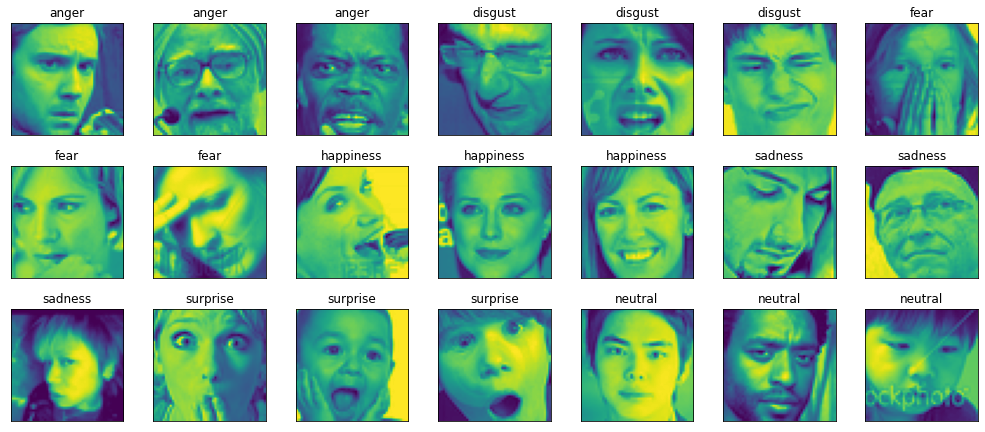

In [15]:
# Visulize sample dataset
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [ ]:
#Now let's parse out the dataframe and create training and testing dataset
# img_arr = df.pixels.apply(lambda x:np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))

In [ ]:
# Joining a sequence of arrays along a new axis.
# img_array = np.stack(img_arr, axis=0)

In [ ]:
# Printing shape
# img_array.shape

(35887, 48, 48, 1)

We also need labels for individual images.
Let's takeout labels

In [ ]:
# extracting labels
# labels =df.emotion.values

In [ ]:
# printing labels
# labels

array([0, 0, 2, ..., 0, 3, 2])

In [16]:
df['pixels']=df['pixels'].astype("string")
pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5
faces -= 1.
emotions = pd.get_dummies(df['emotion']).to_numpy()

In [17]:
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,#Set input mean to 0 over the dataset, feature-wise.
                        featurewise_std_normalization=False,# Divide inputs by std of the dataset, feature-wise.
                        rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                        zoom_range=.1,          # randomly zoom into images
                        horizontal_flip=True)   # randomly flip images

# **Splitting data into train and test datset**

In [ ]:
# #train test split
# X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1)

In [ ]:
# # checking shapes
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32298, 48, 48, 1), (3589, 48, 48, 1), (32298,), (3589,))

In [ ]:
# # applying normalization to speedup convergence
# X_train = X_train/255
# X_test = X_test/255

In [18]:
#train test split
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.3,shuffle=True)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size=0.3,shuffle=True)

In [19]:
# Checking shapes
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape, #xval.shape, xtest.shape, yval.shape, ytest.shape

((25120, 48, 48, 1), (3231, 48, 48, 1), (25120, 7), (3231, 7))

In [20]:
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x

In [21]:
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

In [22]:
def exit_flow(x, num_classes=7) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    return x

In [23]:
inputs = Input(shape=(shape_x, shape_y, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))

In [24]:
xception = Model(inputs, outputs,name="Xception")

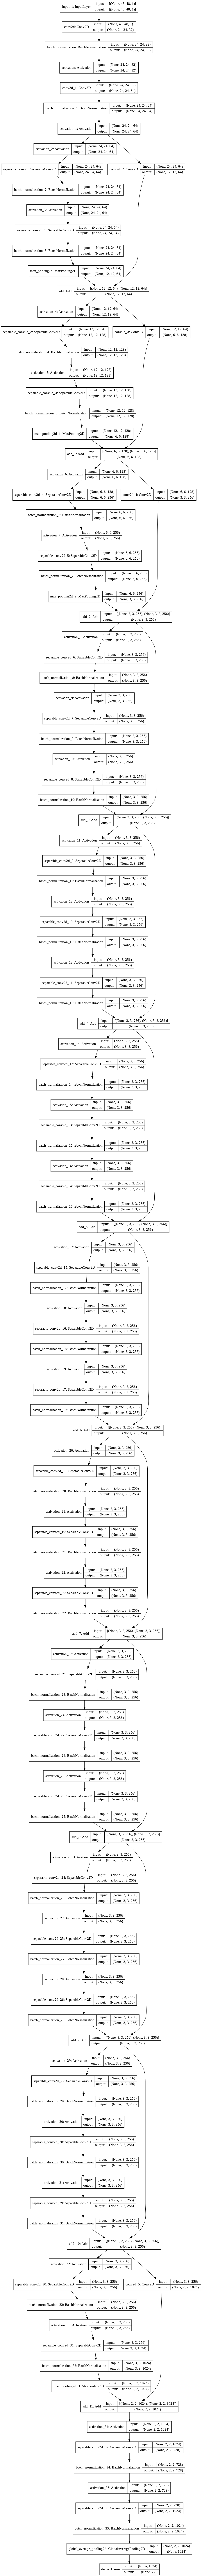

In [25]:
plot_model(xception, to_file='xception.png', show_shapes=True, show_layer_names=True)

In [27]:
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception.summary()  #gives the information about the architecture and configuration of the neural network.

Model: "Xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 24, 24, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 24, 24, 32)   0           batch_normalization[0][0]        
___________________________________________________________________________________________

In [28]:
""" Building up Model Architecture """
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model



In [29]:
CNN=CNN()

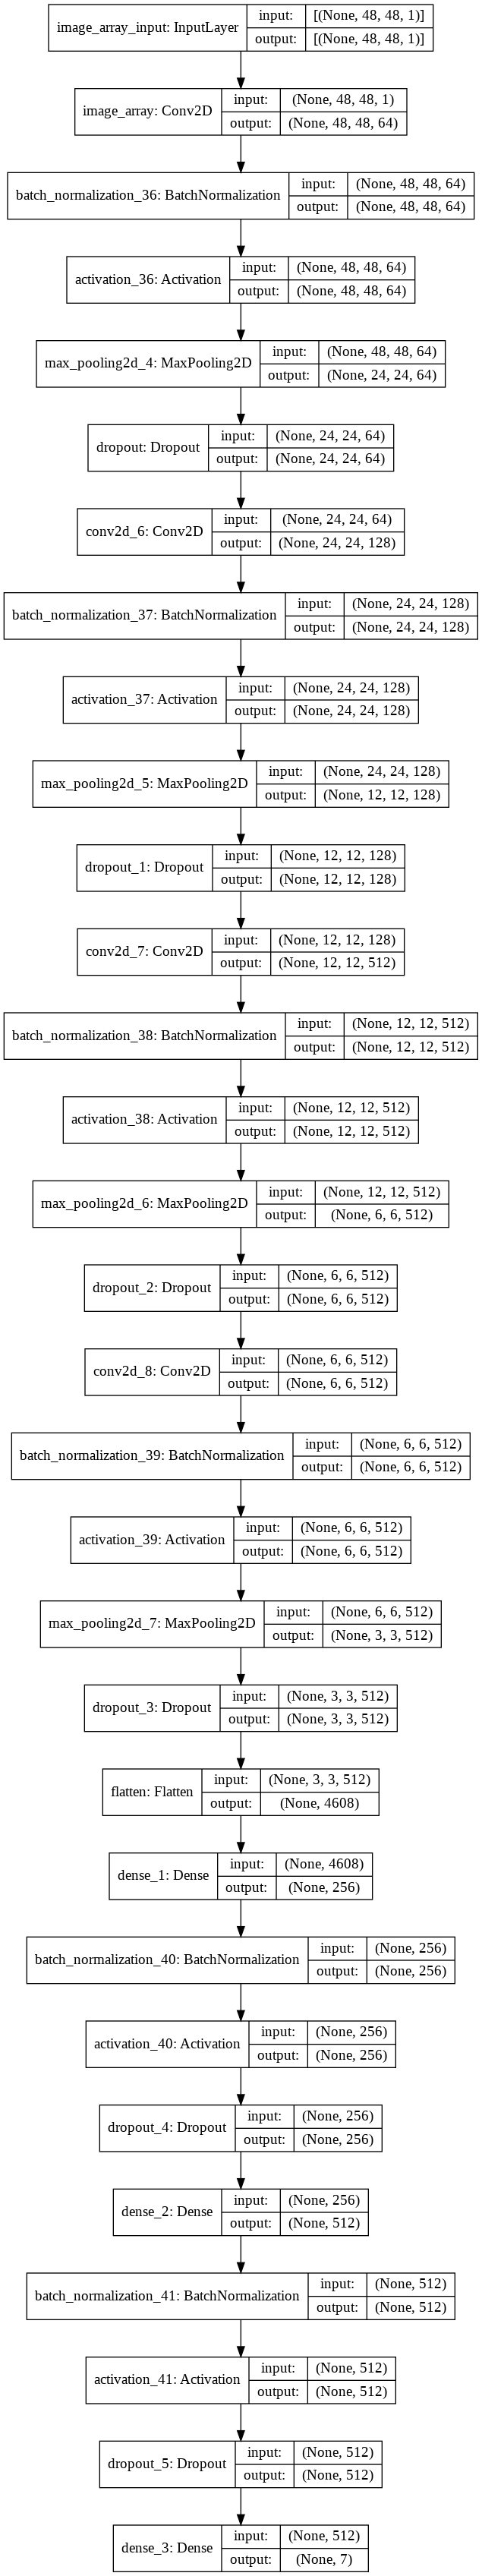

In [30]:
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [31]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_36 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 128)       5

In [32]:
early_stop = EarlyStopping('val_loss', patience=50, min_delta=0, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(50/4), min_delta=0.0001,model='auto')
trained_models_path = base_path + '_Xception'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [34]:
xception_history =xception.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size, 
          epochs=50, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/50
785/785 [==============================] - 50s 63ms/step - loss: 1.0971 - accuracy: 0.5857 - val_loss: 1.4826 - val_accuracy: 0.4998

Epoch 00001: val_loss did not improve from 1.16396
Epoch 2/50
785/785 [==============================] - 49s 62ms/step - loss: 1.0836 - accuracy: 0.5893 - val_loss: 1.1686 - val_accuracy: 0.5698

Epoch 00002: val_loss did not improve from 1.16396
Epoch 3/50
785/785 [==============================] - 49s 63ms/step - loss: 1.0673 - accuracy: 0.5963 - val_loss: 1.0956 - val_accuracy: 0.5853

Epoch 00003: val_loss improved from 1.16396 to 1.09565, saving model to models/_Xception.03-0.59.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/50
785/785 [==============================] - 50s 64ms/step - loss: 1.0525 - accuracy: 0.6041 - val_loss: 1.4108 - val_accuracy: 0.5082

Epoch 00004: val_loss did not improve from 1.09565
Epoch 5/50
785/785 [==============================] - 50s 63ms/step - loss: 1.0396 - accuracy: 0.6084 - val_loss: 1.2126 - val_accuracy: 0.5506

Epoch 00005: val_loss did not improve from 1.09565
Epoch 6/50
785/785 [==============================] - 50s 63ms/step - loss: 1.0270 - accuracy: 0.6134 - val_loss: 1.1358 - val_accuracy: 0.5874

Epoch 00006: val_loss did not improve from 1.09565
Epoch 7/50
785/785 [==============================] - 50s 63ms/step - loss: 1.0149 - accuracy: 0.6177 - val_loss: 1.4164 - val_accuracy: 0.5333

Epoch 00007: val_loss did not improve from 1.09565
Epoch 8/50
785/785 [==============================] - 50s 63ms/step - loss: 1.0071 - accuracy: 0.6213 - val_loss: 1.1361 - val_accuracy: 0.5735

Epoch 00008: val_loss did not improve from 1.09565
Epoch 9/50
785/785 [

# CNN

In [35]:
early_stop = EarlyStopping('val_loss', patience=50)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'CNN'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [36]:
CNN_history =CNN.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/40
785/785 [==============================] - 35s 42ms/step - loss: 1.8484 - accuracy: 0.2774 - val_loss: 1.6236 - val_accuracy: 0.3890

Epoch 00001: val_loss improved from inf to 1.62360, saving model to models/CNN.01-0.39.hdf5
Epoch 2/40
785/785 [==============================] - 32s 41ms/step - loss: 1.5290 - accuracy: 0.4102 - val_loss: 1.3519 - val_accuracy: 0.4760

Epoch 00002: val_loss improved from 1.62360 to 1.35194, saving model to models/CNN.02-0.48.hdf5
Epoch 3/40
785/785 [==============================] - 32s 41ms/step - loss: 1.3913 - accuracy: 0.4668 - val_loss: 1.2963 - val_accuracy: 0.5166

Epoch 00003: val_loss improved from 1.35194 to 1.29633, saving model to models/CNN.03-0.52.hdf5
Epoch 4/40
785/785 [==============================] - 32s 41ms/step - loss: 1.3316 - accuracy: 0.4929 - val_loss: 1.3164 - val_accuracy: 0.5280

Epoch 00004: val_loss did not improve from 1.29633
Epoch 5/40
785/785 [==============================] - 32s 41ms/step - loss: 1.2825 - 

# **Plotting Accuracy & Loss**

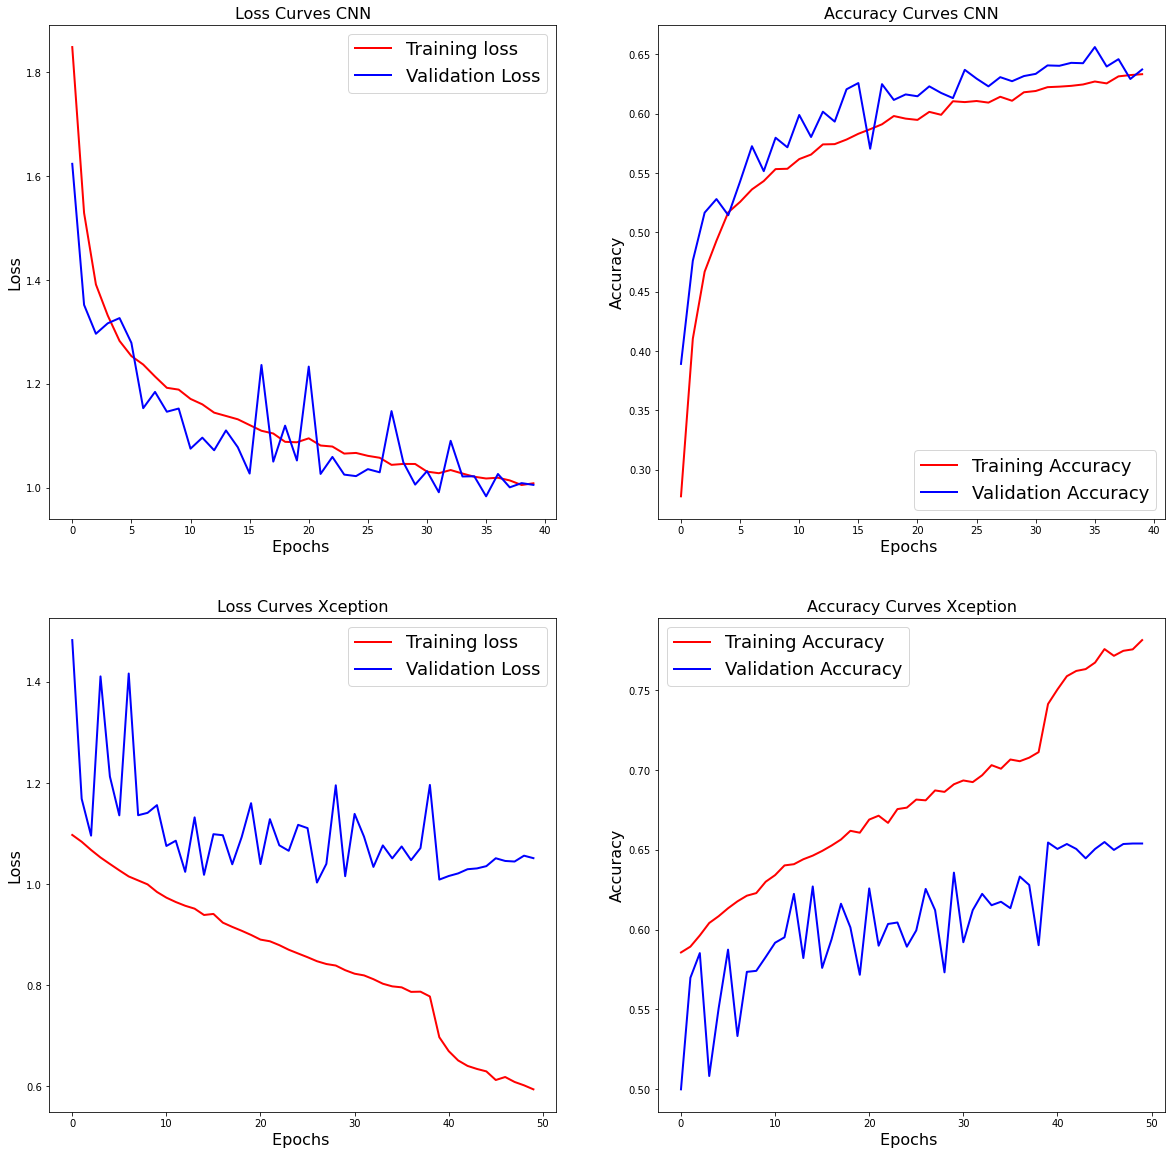

In [40]:
fig,axes=plt.subplots(2,2,figsize=(20, 20))
for (m,history), ax in zip({'CNN':CNN_history,'Xception':xception_history}.items(),axes):
    # Loss Curves    
    ax[0].plot(history.history['loss'],'r',linewidth=2.0)
    ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
    ax[0].legend(['Training loss', 'Validation Loss'],fontsize=18)
    ax[0].set_xlabel('Epochs ',fontsize=16)
    ax[0].set_ylabel('Loss',fontsize=16)
    ax[0].set_title('Loss Curves '+m,fontsize=16)
 
    # Accuracy Curves
    ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
    ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
    ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    ax[1].set_xlabel('Epochs ',fontsize=16)
    ax[1].set_ylabel('Accuracy',fontsize=16)
    ax[1].set_title('Accuracy Curves '+m,fontsize=16)

In [ ]:
plt.savefig('plots.png')

In [38]:
for model in [CNN,xception]:
    ypred=model.predict(xtest)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(ytest, axis=1)
    print(classification_report(ytest_, ypred_,digits=3))

              precision    recall  f1-score   support

           0      0.557     0.635     0.593       449
           1      0.792     0.380     0.514        50
           2      0.596     0.324     0.419       479
           3      0.844     0.847     0.845       809
           4      0.600     0.441     0.509       569
           5      0.729     0.789     0.758       369
           6      0.463     0.737     0.569       506

    accuracy                          0.637      3231
   macro avg      0.654     0.593     0.601      3231
weighted avg      0.651     0.637     0.629      3231

              precision    recall  f1-score   support

           0      0.620     0.559     0.588       449
           1      0.689     0.620     0.653        50
           2      0.527     0.495     0.510       479
           3      0.875     0.844     0.859       809
           4      0.527     0.552     0.539       569
           5      0.771     0.748     0.759       369
           6      0.539 

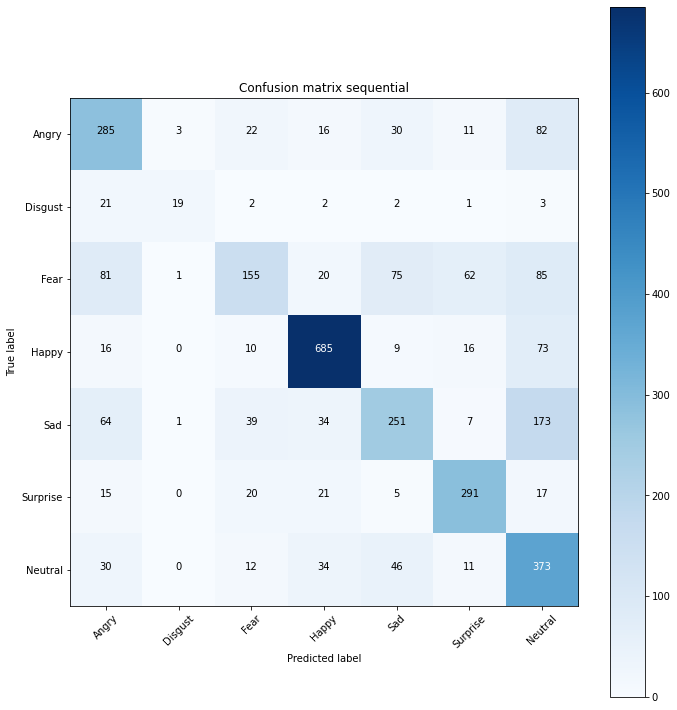

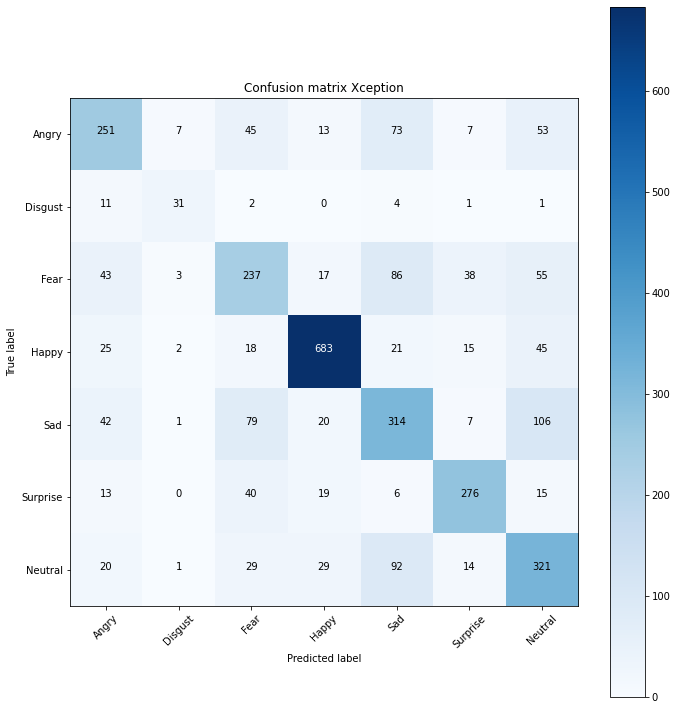

In [39]:
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure


for model,i in zip([CNN,xception],[1,2,3]):
    fig = figure(figsize=(10, 10))
    
    ypred=model.predict(xtest)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(ytest, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model.name
    

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()
    

# **Method 1: Facial expression recognition using Convolutional Neural Networks(CNN):**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.

Right now, all you need to know that a Convolution Neural Network or CNN as it is popularly called is a collection of mainly two types of layers-

1) The hidden layers / Feature Extraction Part

* convolutions
* pooling

2) The classifier part

Here I am using Keras with TensorFlow as the back-end for building Neural Networks. Further generalization, We have following layers in the keras to be added are

1. Convolution layer
2. Pooling layer
3. Batch normalization
4. Activation Layer
5. Dropout Layer
6. Flatten Layer
7. Dense layer


# **Modelling**

# **Data Augmenttion**

**Data Augmentation**:- taking the batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizability of model.



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

**ImageDataGenerator**

horizontal and vertical shift => moving all pixels of image in one direction

1. width_shift_range ( horizonatal shift)

2. height_shift_range (vertical shift)
3. floating num [0- 1] --> % of shift

*  horizontal n vertical flips augmentation ==>reversing rows or cols of pixels --> True or False

*  Random rotation --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees
*  random brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1
*  random zoom
1. either adds pixel or subtract pixels in image . [1-value, 1+value]
2. for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)


###Save checkpoints during training

**keras**

* callbacks => an object that can perform actions at various stages of training
1. write tensorflowboard logs after every batch
2. periodically save model to disk
3. do early stopping 
4. view on internal states and statistics during training
(used in fit() loop)

* EarlyStopping() --> stop training when a monitored metric has stopped improving
1. monitor = "val_loss" --> loss function to be monitored

2. verbose ==> 0: quiet , 1: update msgs
3. min_delta --> minimum change to count(threshold)
4. patience --> no of epochs with no improvement to stop training
* ModelCheckpoint() -->to save keras model or model weights at some frequency
filepath
1. monitor --> val_acc or val_loss
2. save_best_only = True